# Ensembling
- Very popular method for improving the predictive performance of machine learing models
- Provides a foundation for understanding more sophisticated models

## Lesson Objectives
student will be able to:
- Define ensembling and its requirements
- Identify the two basic methods of ensembling
- Decide whether manual ensembling is a useful approach for a given problem
- Explain bagging and how it can be applied to decision trees
- Explain how out-of-bag error and feature importances are calculated from bagged trees
- Explain the difference between bagged and Random Forests
- Build and tune a Random Forest model in scikit-learn
- Decide whether a decision tree or a Random Forest is a better model for a given problem

# Part 1: Introduction
Let's pretend that instead of building a single model to solve a binary classification problem, you created **five independent models**, and each model was correct about 70% of the time. If you combined these models into an "ensemble" and used their majority vote as a prediction, how often would the ensemble be correct? 


In [3]:
import numpy as np
np.random.seed(1234)
# generate 1000 random numbers (between 0 and 1) for each model, representing 1000 observations
mod1 = np.random.rand(1000)
mod2 = np.random.rand(1000)
mod3 = np.random.rand(1000)
mod4 = np.random.rand(1000)
mod5 = np.random.rand(1000)

# each model independently predicts 1 (the "correct response") if random number was at least 0.3
preds1 = np.where(mod1 > 0.3, 1, 0)
preds2 = np.where(mod2 > 0.3, 1, 0)
preds3 = np.where(mod3 > 0.3, 1, 0)
preds4 = np.where(mod4 > 0.3, 1, 0)
preds5 = np.where(mod5 > 0.3, 1, 0)

print(preds1[:20])
print(preds2[:20])
print(preds3[:20])
print(preds4[:20])
print(preds5[:20])


[0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1]
[1 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0]
[1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1]
[1 1 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0]
[0 0 1 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1]


In [4]:
# average the predictions and then round to 0 or 1
ensemble_preds = np.round((preds1 + preds2 + preds3 + preds4 + preds5)/5.0).astype(int)

In [5]:
ensemble_preds

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0,

In [6]:
print(preds1.mean())
print(preds2.mean())
print(preds3.mean())
print(preds4.mean())
print(preds5.mean())

0.713
0.665
0.717
0.712
0.687


In [7]:
print(ensemble_preds.mean())

0.841


# What is ensembling?
**Ensemble learning(or "ensembling")** is the process of combining several prediction models in order to produce a combined model that is more accurate than any individual model. 
- **Regression**: take the avearage of the predictions
- **Classification**: take a vote and use the most common prediction, or take the average of the prediction probabilities. 

For ensembling to work well, the models must have the following characteristics:
- **Accurate**: they outperform the null model
- **Independent**: their prediction are generated using different processes

**The big idea**: If you have a collection of individually imperfect(and independent) models, the "one-off" mistakes made by each model are probably not going to be made by the rest of the models, and thus the mistakes will be discarded when averaging the models. 

There are two basic **methods for ensembling**:
- Manually ensemble your indivual models
- Use a model that ensembles for you

# Part 2: Manual ensembling
What makes a good manual ensembling?
- Different types of **models**
- Different combinations of **features**
- Different **tunning parameters**


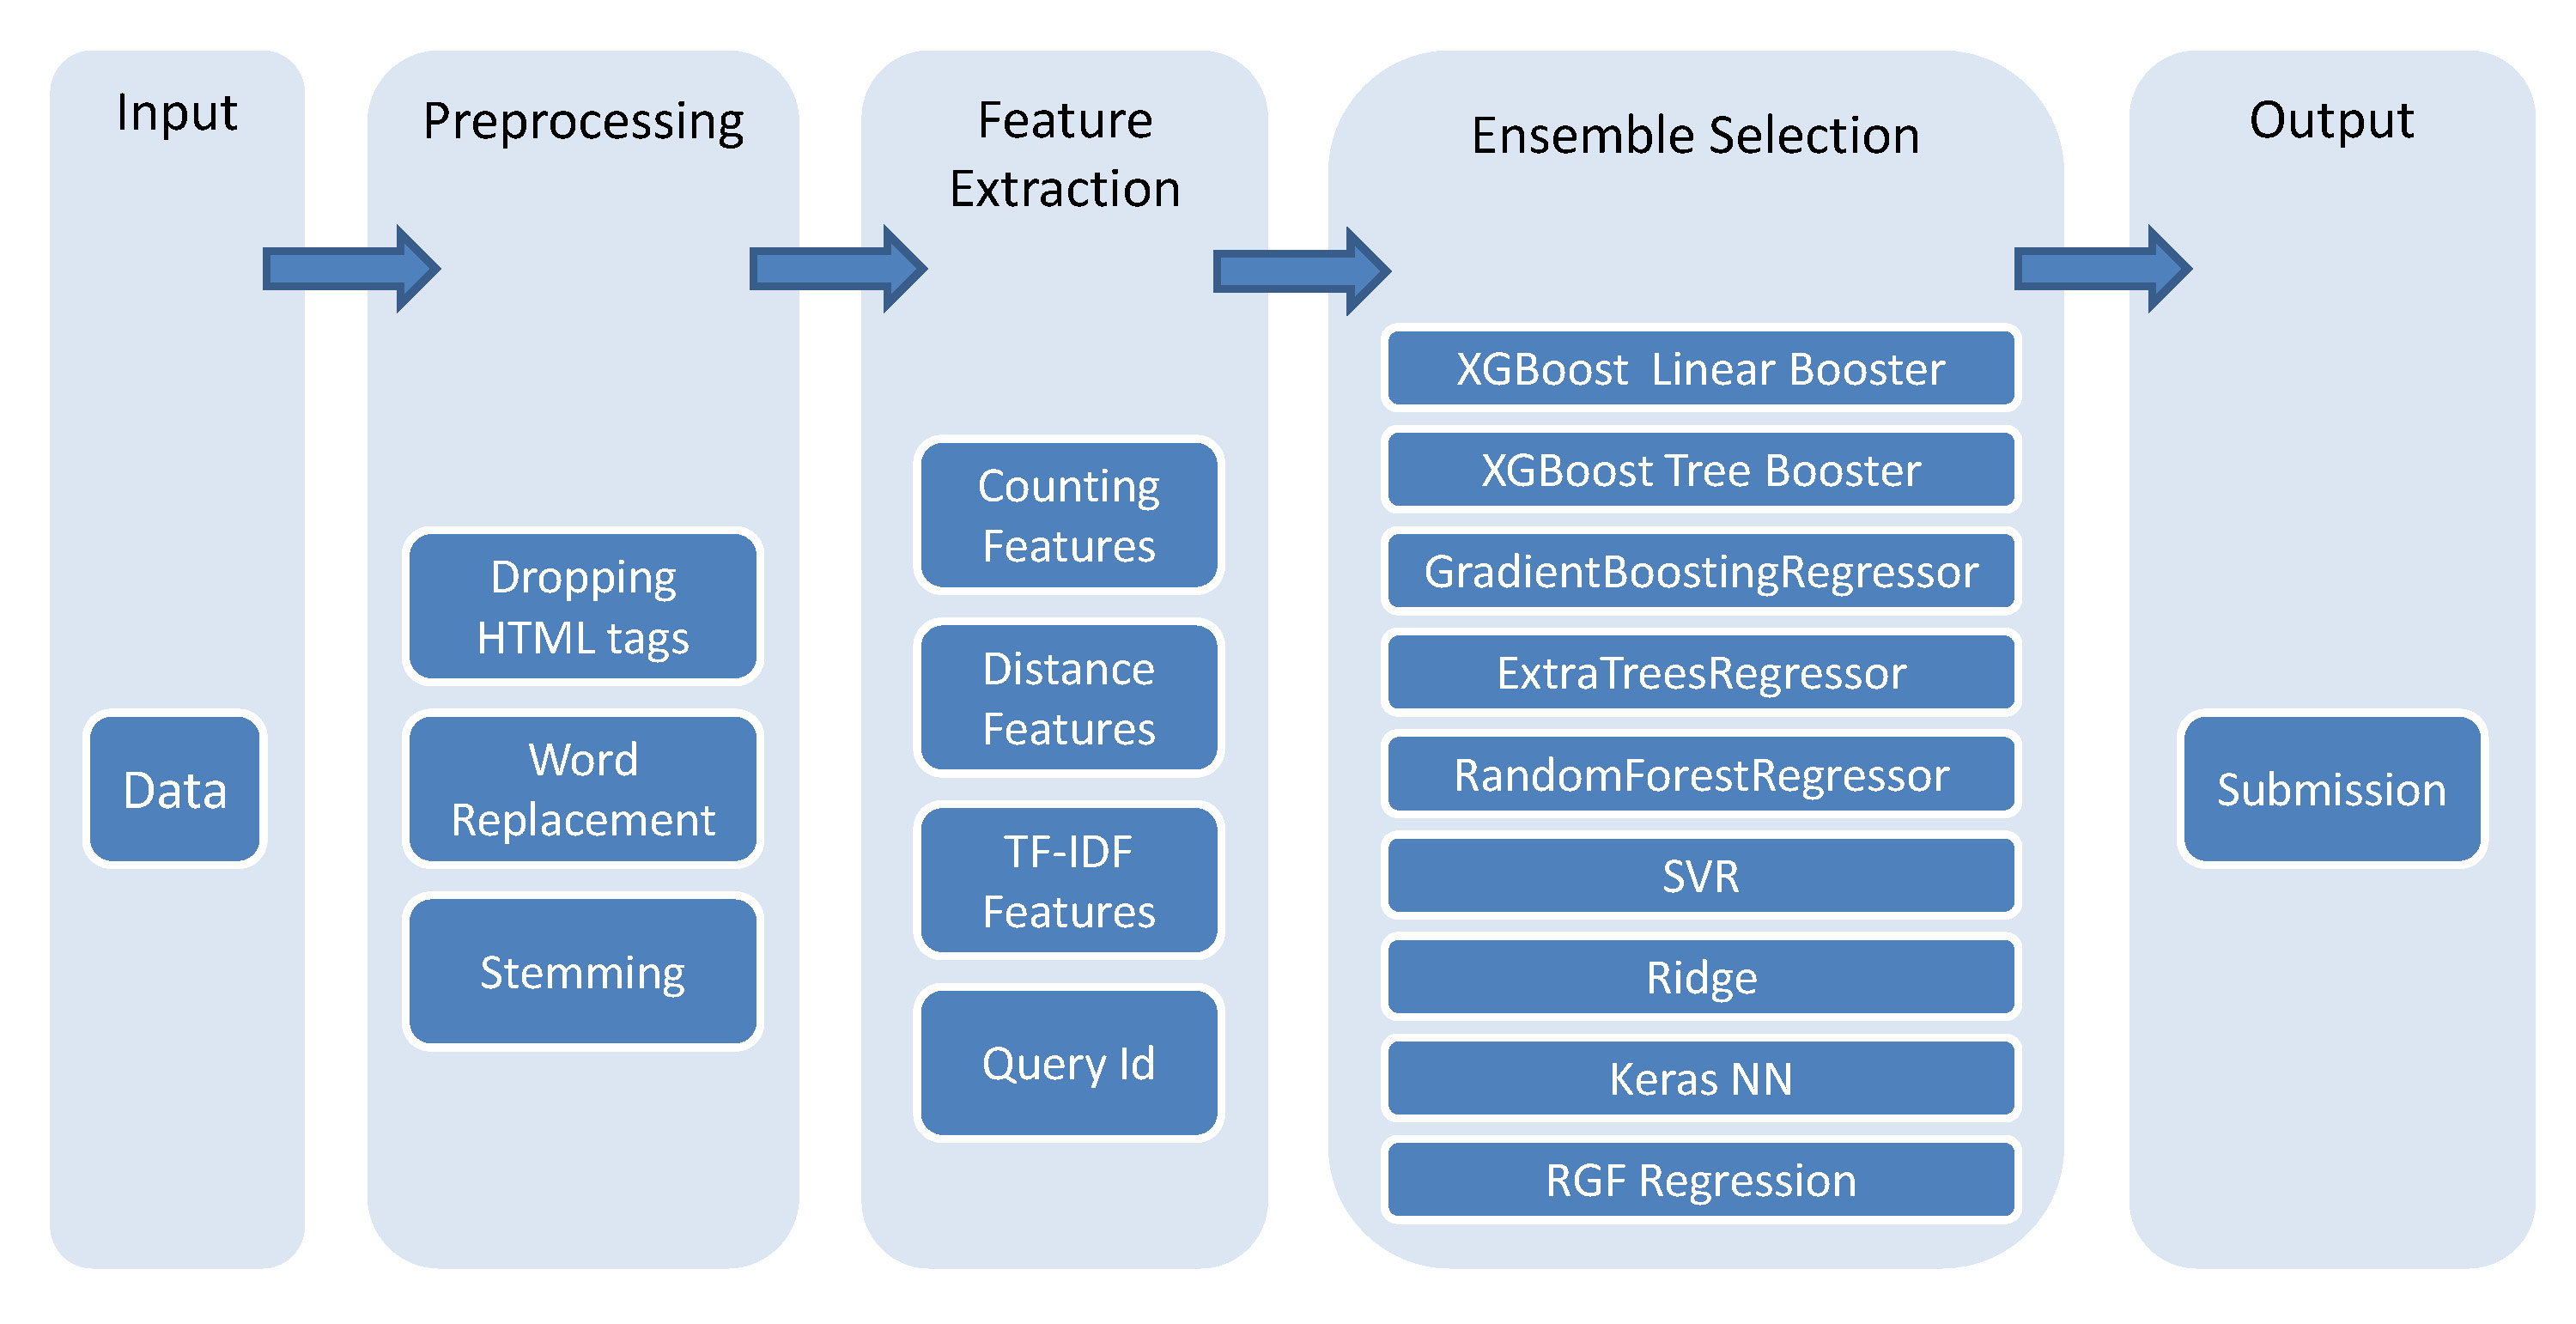

In [8]:
from IPython.display import Image
Image(filename=("/Users/yimanzhang/Desktop/FlowChart.jpg"))

## Comparing manual ensembling with a single model approach
### Advantages of manual ensembling:
- Increase predictive accuracy
- Easy to get started

### Disadvantages of manual ensembling:
- Decrease interpretability
- Takes longer to train
- Takes longer to predict 
- More complex to automate and maintain
- Small gains in accuracy may not be worth the added complexity

# Part 3: Bagging 
The primary weakness of **decision trees** is that they don't tend to have the best predictive accuracy. This is partically due to **high variance**, meaning different splits in the training data can lead to very different trees. 

**Bagging** is a general purpose procedure for reducing the variance of a machine learning method, but is particularly useful for decision trees. Bagging is short for **bootstrap aggregation**, meaning the aggregation of booststrap samples. 

What is a **bootstrap sample**? A random sample with replacement:

In [9]:
np.random.seed(1)
nums = np.arange(1, 21)
np.random.choice(a=nums, size=20, replace=True)

array([ 6, 12, 13,  9, 10, 12,  6, 16,  1, 17,  2, 13,  8, 14,  7, 19,  6,
       19, 12, 11])

### How does bagging work(for decision trees)?

1. Grow B trees using B bootstrap samples from the training data
2. Train each tree on its bootstrap sample and make predictions
3. Combine the predictions:
- Average the prediction for **regression trees**
- Take a vote for **classification tree**

Notes:
- **Each bootstrap sample** should be the same size as the original training set.
- **B** should be a large enough value that the error seems to have"stabilized".
- This trees are **grown deep** so that they have low bias/high variance

Bagging increase predictive accuracy by **reducing the variance**

## Manually implementing bagged decision trees(with B=10)


In [10]:
import pandas as pd
url="https://raw.githubusercontent.com/justmarkham/DAT8/master/data/vehicles_train.csv"
train = pd.read_csv(url)
train['vtype'] = train.vtype.map({'car':0, 'truck':1})
train

,price,year,miles,doors,vtype
0,22000,2012,13000,2,0
1,14000,2010,30000,2,0
2,13000,2010,73500,4,0
3,9500,2009,78000,4,0
4,9000,2007,47000,4,0
5,4000,2006,124000,2,0
6,3000,2004,177000,4,0
7,2000,2004,209000,4,1
8,3000,2003,138000,2,0
9,1900,2003,160000,4,0


In [11]:
np.random.seed(123)
samples = [np.random.choice(a=14, size=14, replace=True) for _ in range(1,11)]
samples

[array([13,  2, 12,  2,  6,  1,  3, 10, 11,  9,  6,  1,  0,  1]),
 array([ 9,  0,  0,  9,  3, 13,  4,  0,  0,  4,  1,  7,  3,  2]),
 array([ 4,  7,  2,  4,  8, 13,  0,  7,  9,  3, 12, 12,  4,  6]),
 array([ 1,  5,  6, 11,  2,  1, 12,  8,  3, 10,  5,  0, 11,  2]),
 array([10, 10,  6, 13,  2,  4, 11, 11, 13, 12,  4,  6, 13,  3]),
 array([10,  0,  6,  4,  7, 11,  6,  7,  1, 11, 10,  5,  7,  9]),
 array([ 2,  4,  8,  1, 12,  2,  1,  1,  3, 12,  5,  9,  0,  8]),
 array([11,  1,  6,  3,  3, 11,  5,  9,  7,  9,  2,  3, 11,  3]),
 array([ 3,  8,  6,  9,  7,  6,  3,  9,  6, 12,  6, 11,  6,  1]),
 array([13, 10,  3,  4,  3,  1, 13,  0,  5,  8, 13,  6, 11,  8])]

In [12]:
train.iloc[samples[0],:]

,price,year,miles,doors,vtype
13,1300,1997,138000,4,0
2,13000,2010,73500,4,0
12,1800,1999,163000,2,1
2,13000,2010,73500,4,0
6,3000,2004,177000,4,0
1,14000,2010,30000,2,0
3,9500,2009,78000,4,0
10,2500,2003,190000,2,1
11,5000,2001,62000,4,0
9,1900,2003,160000,4,0


In [13]:
url = "https://raw.githubusercontent.com/justmarkham/DAT8/master/data/vehicles_test.csv"
test = pd.read_csv(url)
test['vtype'] = test.vtype.map({'car':0, 'truck':1})
test

,price,year,miles,doors,vtype
0,3000,2003,130000,4,1
1,6000,2005,82500,4,0
2,12000,2010,60000,2,0


In [14]:
from sklearn.tree import DecisionTreeRegressor
treereg = DecisionTreeRegressor(max_depth=None, random_state=123)
predictions=[]
X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]
for sample in samples:
    X_train = train.iloc[sample, 1:]
    y_train = train.iloc[sample, 0]
    treereg.fit(X_train, y_train)
    y_pred=treereg.predict(X_test)
    predictions.append(y_pred)
predictions=np.array(predictions)
predictions

array([[  1300.,   5000.,  14000.],
       [  1300.,   1300.,  13000.],
       [  3000.,   3000.,  13000.],
       [  4000.,   5000.,  13000.],
       [  1300.,   5000.,  13000.],
       [  4000.,   5000.,  14000.],
       [  4000.,   4000.,  13000.],
       [  4000.,   5000.,  13000.],
       [  3000.,   5000.,   9500.],
       [  4000.,   5000.,   9000.]])

In [15]:
np.mean(predictions, axis=0)

array([  2990.,   4330.,  12450.])

In [16]:
from sklearn import metrics
y_pred = np.mean(predictions, axis=0)
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

998.58232843700307

# Bagged decision trees in scikit-learn(with B=500)


In [17]:
X_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]
X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]

In [18]:
from sklearn.ensemble import BaggingRegressor
bagreg = BaggingRegressor(DecisionTreeRegressor(), n_estimators=500, bootstrap=True, oob_score=True, random_state=1)

In [19]:
bagreg.fit(X_train, y_train)
y_pred = bagreg.predict(X_test)
y_pred

array([  3344.2,   5395. ,  12902. ])

In [20]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

657.80003040437748

# Estimating out-of-sample error
For Bagged models, out-of-sample error can be estimated without using **train/test split** or **cross-validations** 

On average, each bagged tree uses about **two-thirds** of the observations. For each tree, the **remaining observations**are called "out-of-bag" observations.

In [21]:
bagreg.oob_score_

0.76698184959239768

# Estimating feature importance
Bagging increase **predictive accuracy**, but decrease **model interpretability** because it's no longer possible to visualize the tree to understand the importance of each feature. 

However, we can still obtain an overall summary of **feature importance** from bagged models:
- **Bagged regression trees**: calculate the total amount that **MSE** is decreased due to splits over a given feature, averaged over all trees. 
- **Bagged classification trees**: calculate the total amoount that **Gini index** is decreased due to splits over a given feature, average over all trees. 

# Part 4: Random Forests 
[parameters](http://scikit-learn.org/stable/modules/ensemble.html#parameters)

[large scale decision forest lesson learned](http://blog.siftscience.com/2015/large-scale-decision-forests-lessons-learned/)

Random Forests is a **slight variation of bagged trees** that has even better performance:
- Exactly like bagging, we create an ensemble of decision trees using bootstrapped samples of the training set. 
- However, when building each tree, each time a split is considered, a **random sample of m features** is chosen as split candidates from the **full set of p features**. The split is only allowed to use **one of those m features**. 
 - A new random sample of features is chosen for **every single tree at every single split**
 - For **classification**, m is typically chosen to be the square root of p
 - For **regression**, m is typically chosen to be somewhere between p/3 and p. 

What's the point?
- Suppose there is **one very strong feature** in the data set. When using bagged trees, most of the trees will use that feature as the top split, resulting in an ensemble of similar trees that are highly correlated. 
- Averaging highly correlated quantities doesn't significantly reduce variance(which is the entire goal of bagging). 
- By randomly leaving out candidate features from each split, **Random Forests "decorrelates" the trees**, such that the averaging process can reduce the variance of the resulting model. 

# Part 5: Building and tunning decision trees and Random Forests
## Preparing the data


In [22]:
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/hitters.csv'
hitters = pd.read_csv(url)
hitters.dropna(inplace=True)

In [23]:
hitters.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [24]:
hitters['League'] = pd.factorize(hitters.League)[0]
hitters['Division'] = pd.factorize(hitters.Division)[0]
hitters['NewLeague'] = pd.factorize(hitters.NewLeague)[0]

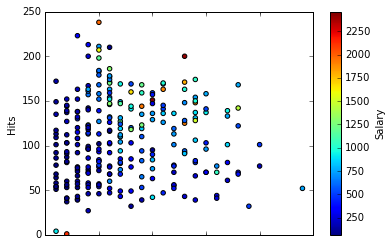

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
hitters.plot(kind='scatter', x='Years', y='Hits', c='Salary', colormap='jet',xlim=(0, 25), ylim=(0,250))

In [28]:
feature_cols = hitters.columns[hitters.columns.str.startswith('C')==False].drop('Salary')
feature_cols

Index(['AtBat', 'Hits', 'HmRun', 'Runs', 'RBI', 'Walks', 'Years', 'League',
       'Division', 'PutOuts', 'Assists', 'Errors', 'NewLeague'],
      dtype='object')

In [29]:
X = hitters[feature_cols]
y = hitters.Salary

# Predicting salary with a decision tree
Find the best **max_depth** for a decision tree using cross-validation:

In [30]:
max_depth_range = range(1, 21)
RMSE_scores = []
from sklearn.cross_validation import cross_val_score
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X,y,cv=10,scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

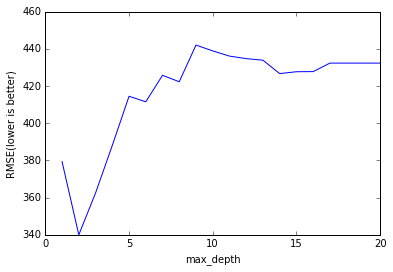

In [31]:
plt.plot(max_depth_range, RMSE_scores)
plt.xlabel('max_depth')
plt.ylabel('RMSE(lower is better)')

In [34]:
sorted(zip(RMSE_scores, max_depth_range))

[(340.03416870475201, 2),
 (362.52123089520518, 3),
 (379.38597162315762, 1),
 (388.07415342382001, 4),
 (411.56205881436182, 6),
 (414.53333823604225, 5),
 (422.35038060456657, 8),
 (425.79021698873214, 7),
 (426.71699327572912, 14),
 (427.7241006561602, 15),
 (427.79188752919464, 16),
 (432.36178632334497, 17),
 (432.36178632334497, 18),
 (432.36178632334497, 19),
 (432.36178632334497, 20),
 (433.91666463133413, 13),
 (434.77410978600062, 12),
 (436.1256925567335, 11),
 (438.93066661985222, 10),
 (442.05361035950153, 9)]

In [35]:
treereg = DecisionTreeRegressor(max_depth=2, random_state=1)
treereg.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=1,
           splitter='best')

In [37]:
pd.DataFrame({'feature':feature_cols, 'importance':treereg.feature_importances_})

,feature,importance
0,AtBat,0.000000
1,Hits,0.511609
2,HmRun,0.000000
3,Runs,0.000000
4,RBI,0.000000
5,Walks,0.000000
6,Years,0.488391
7,League,0.000000
8,Division,0.000000
9,PutOuts,0.000000


# Predicting salary with a Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor()
rfreg

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=None,
           verbose=0, warm_start=False)

## Tunning n_estimators
One important tunning parameter is n_estimators, which is the number of trees that should be grown. It should be a large enough value that the error seems to have "stabilized".

In [40]:
estimator_range = range(10, 310, 10)
RMSE_scores = []
for estimator in estimator_range:
    rfreg = RandomForestRegressor(n_estimators=estimator, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=5, scoring="mean_squared_error")
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

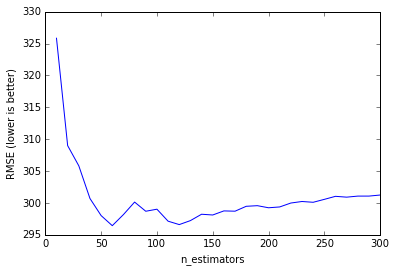

In [41]:
plt.plot(estimator_range, RMSE_scores)
plt.xlabel('n_estimators')
plt.ylabel('RMSE (lower is better)')

## Tuning max_features
The other important tunning parameter is **max_features**, which is the number of feature that should be considered at each split. 

In [42]:
feature_range = range(1, len(feature_cols)+1)
RMSE_scores = []
for feature in feature_range: 
    rfreg=RandomForestRegressor(n_estimators=150, max_features=feature, random_state=1)
    MSE_scores = cross_val_score(rfreg, X, y, cv=10, scoring='mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))

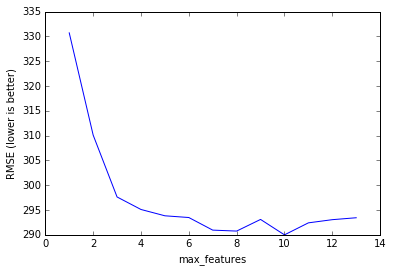

In [43]:
plt.plot(feature_range, RMSE_scores)
plt.xlabel('max_features')
plt.ylabel('RMSE (lower is better)')

In [45]:
dict(zip(RMSE_scores, feature_range))

{290.00785113284348: 10,
 290.76913266387498: 8,
 290.9622683582366: 7,
 292.42786469450152: 11,
 293.0690659567307: 12,
 293.11731778938855: 9,
 293.45761431300673: 13,
 293.50291241144475: 6,
 293.85082625794416: 5,
 295.12351412486237: 4,
 297.64680677115257: 3,
 310.12674048777524: 2,
 330.73037595441394: 1}

## Fitting a Random Forest with the best parameters

In [52]:
rfreg = RandomForestRegressor(n_estimators=150, max_features=10, oob_score=True, random_state=1)
rfreg.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features=10, max_leaf_nodes=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=1, oob_score=True, random_state=1,
           verbose=0, warm_start=False)

In [53]:
pd.DataFrame({'feature':feature_cols, 'importance':rfreg.feature_importances_}).sort('importance')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


,feature,importance
7,League,0.002977
12,NewLeague,0.003714
8,Division,0.005152
10,Assists,0.022721
11,Errors,0.026977
2,HmRun,0.039670
9,PutOuts,0.058314
3,Runs,0.061564
0,AtBat,0.093026
4,RBI,0.140024


In [54]:
rfreg.oob_score_

0.5267040757111412

# Reducing X to its most important features

In [55]:
X.shape

(263, 13)

In [58]:
print(rfreg.transform(X, threshold=0.1).shape)
print(rfreg.transform(X, threshold='mean').shape)
print(rfreg.transform(X, threshold='median').shape)

(263, 4)
(263, 5)
(263, 7)


/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


In [59]:
X_important = rfreg.transform(X, threshold='mean')

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


In [60]:
rfreg = RandomForestRegressor(n_estimators=150, max_features=3, random_state=1)
scores = cross_val_score(rfreg, X_important, y, cv=10,scoring='mean_squared_error')

In [62]:
np.mean(np.sqrt(-scores))

284.35550515135395

# Comparing Random Forests with decision trees
## Advantage of Random Forests:
- Performance is competitive with the best supervised learning methods
- Provides a more reliable estimate of feature importance
- Allows you to estimate out-of-sample error without using train/test split or cross-validation

## Disadvantage of Random Forests:
- Less interpretable
- Slower to train
- Slower to predict 